In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

In [2]:
df=pd.read_csv(r"C:/Users/User/Downloads/twitter_sentiment_train.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Data Preprocessing

In [4]:
#remove pattern in the input text
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt) #find all the patterns in the input text
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt

In [5]:
# remove twitter handles(@users)
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [6]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
#remove special characters,numbers,punctuations
df['clean_tweet']=df['clean_tweet'].str.replace("^[a-zA-Z#]"," ")

C:\Users\User\AppData\Local\Temp\ipykernel_6196\415793538.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet']=df['clean_tweet'].str.replace("^[a-zA-Z#]"," ")


In [8]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
#remove shortwords
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [10]:
#Tokenizing the tweets(individual words considered as tokens)
tokenized_tweets=df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [11]:
#stemming the words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweets=tokenized_tweets.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [12]:
#combine words into single sentence
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i]=" ".join(tokenized_tweets[i])
df['clean_tweet']=tokenized_tweets
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


# Data Analysis

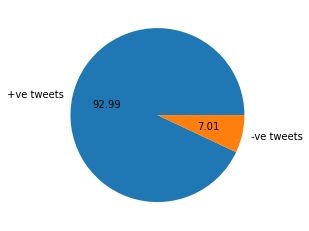

In [13]:
plt.pie(df['label'].value_counts(),labels=['+ve tweets','-ve tweets'],autopct="%0.2f")
plt.show()

The chart above shows that our data is imbalanced.

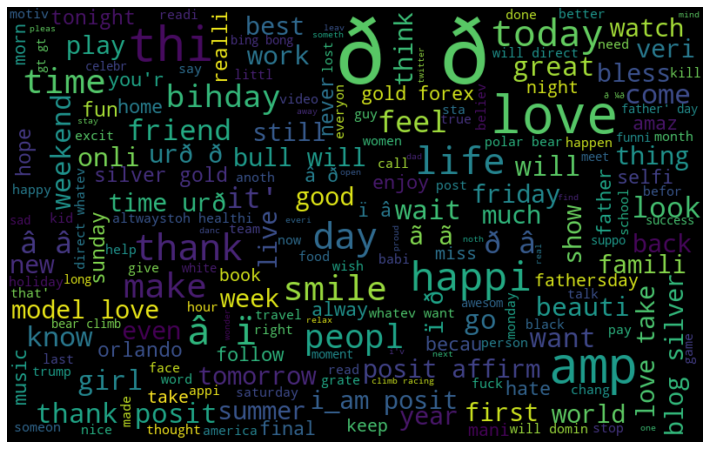

In [14]:
#visualize the frequent words
all_words=" ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

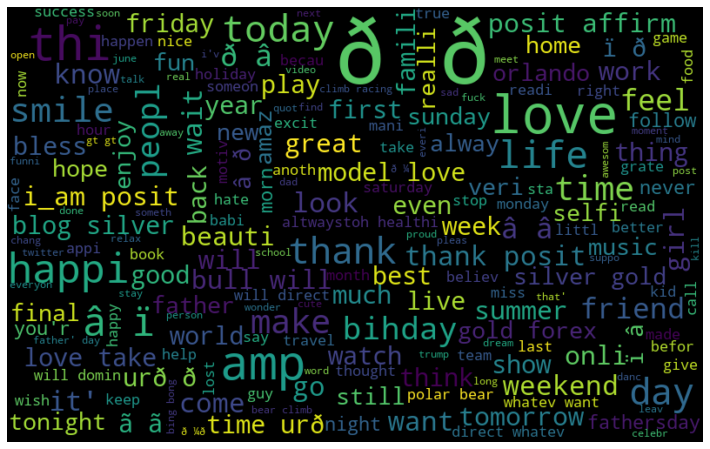

In [15]:
#frequent words visualization for +ve tweets
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

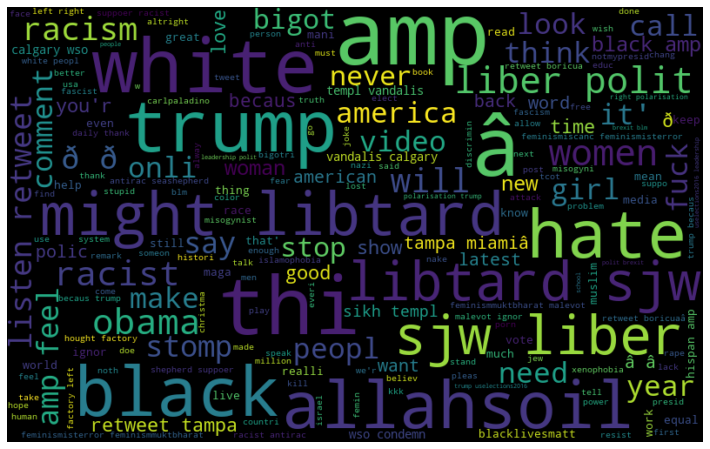

In [16]:
#frequent words visualization for -ve tweets
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
#extract the hashtags
def hashtag_extract(tweets):
    hashtags=[]
    #loop words in the tweet
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [18]:
#extract hashtags for non_racists/sexist tweets
ht_positive=hashtag_extract(df['clean_tweet'][df['label']==0])

#extract hashtags for racists/sexist tweets
ht_negative=hashtag_extract(df['clean_tweet'][df['label']==1])

In [19]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], [], ['motiv']]

In [20]:
# unnest list
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [21]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'motiv']

In [22]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,motiv,191


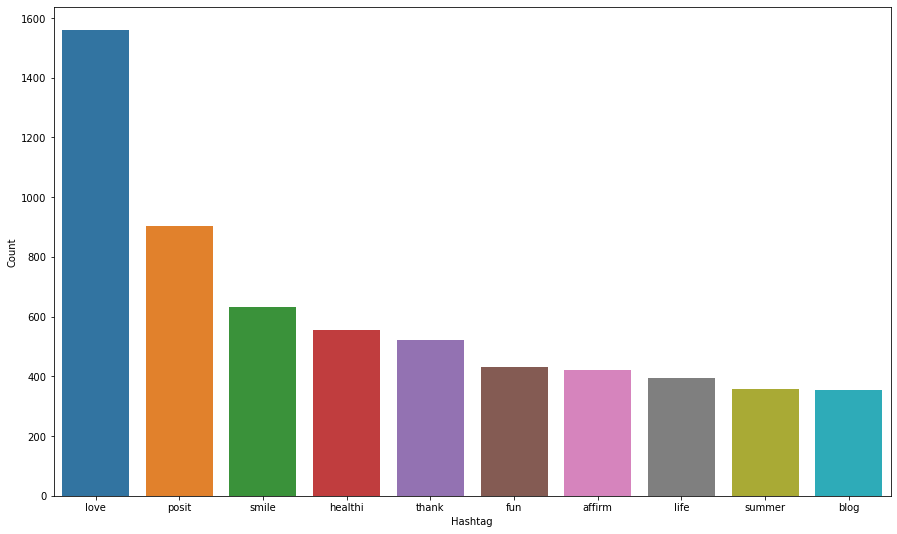

In [23]:
#select top 10 hashtags
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [24]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,8
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


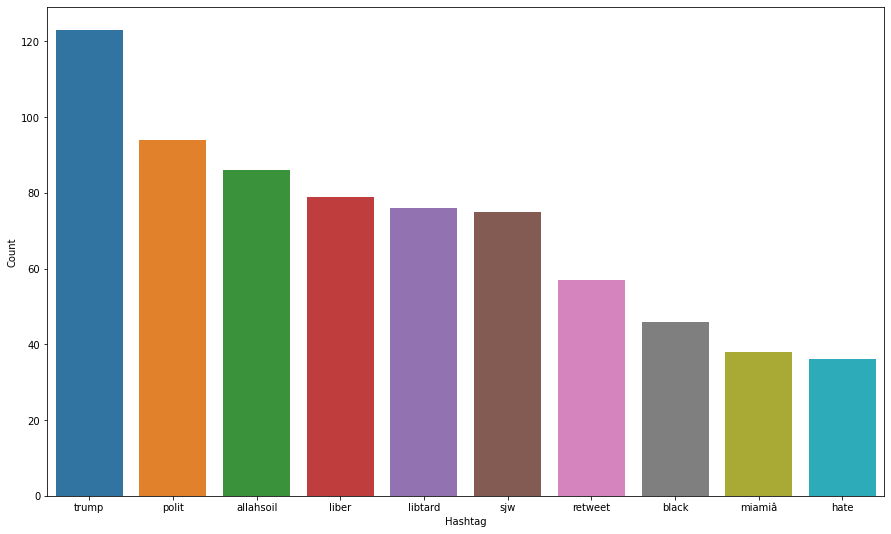

In [25]:
#select top 10 hashtags
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

# Model Building 

In [26]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=12000,stop_words='english')

X=tfidf.fit_transform(df['clean_tweet']).toarray()

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,df['label'],random_state=42,test_size=0.25)

In [28]:
#training
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
lr=LogisticRegression()

In [29]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8363158553372544
[[6341 1091]
 [ 217  342]]
0.23866015352407538


In [30]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9503191089976223
[[7431    1]
 [ 396  163]]
0.9939024390243902


In [31]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9520710799649605
[[7314  118]
 [ 265  294]]
0.7135922330097088


In [32]:
lr.fit(x_train,y_train)
y_pred4=lr.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9475660117632336
[[7415   17]
 [ 402  157]]
0.9022988505747126


Here we will use the multinomial Naive Bayes classifier since it has higher accuracy and higher precision as well. We are considering the precision since our data is imbalanced.